In [27]:
# Oreilly Chapter 1

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [11]:
# Load the data
oecd_bli = pd.read_csv("../Data/BLI_08112019231419768.csv", thousands=',')
gdp_per_capita = pd.read_csv("../Data/WEO_Data.xls", thousands = ',', 
                             delimiter = '\t', 
                             encoding ='latin1',
                            na_values = 'n/a')

In [14]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [15]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [18]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [19]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]


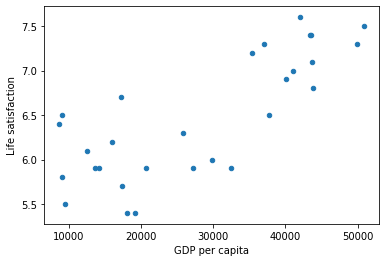

In [22]:
# Visualize the data 
country_stats.plot(kind='scatter',x="GDP per capita", y='Life satisfaction')
plt.show()

In [28]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()
# Train the model
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
#Make a prediction for Cyprus
X_new = [[22587]]
print(model.predict(X_new))

[[6.25984414]]


# Exercises:

#### 1) How would you define Machine Learning?

###### Machine Learning is about building systems that can learn from data.  Learning means getting better at some task, given some performance measure.

#### 2) Can you name 4 types of problems where it shines?

###### Machine learning is great for comple problems for which we have no algorithmic solution, to replace long lists of hand tuned rules, to build systems that adapt to fluctuating environments, and finally to help humans learn.

#### 3) What is a labeled training set?

###### A labeled training set is a training set that contains the desired solutions for each observation

#### 4) What are the two most common supervised tasks?

###### Common supervised tasks are linear regression and classification

#### 5) Can you name 4 common unsupervised tasks?

###### Common unsupervised tasks include clustering, visualization, dimensionality reduction, and association rule learning

#### 6) What type of Machine Learning algorithm would you use to allow a robot to walk in various unknown terrains?


###### Reinforcement learning is likely to perform best if we want a robot to learn to walk in various unknown terrains since this is typically the type of problem that reinforcement learning tackles.  It might be possible to express the problem as a supervised r semisupervised learning problem ut it would be less natural.

#### 7) What type of algorithm would you use to segment your customers into multiple groups?

###### If you dont know your group you can use clustering, if you have a set of groups you want to try and match on you would use classification.

#### 8) Woud you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?

###### Spam detection is typically supervised.  The algorithm is fed spam or not spam as the label.

#### 9) What is an online learning system?

######  Online learning system ca learn incrementally, as opposed to batch learning. This makes it capable of adapting rapidly to both changing data and autonomous systems and of training on very large quantities of data.

#### 10) What is out of core learning?


###### It can handle vast quantities of data that cannot fit in a computers main memory.  An out of core learning algorithm chops the data into mini batches and uses online learning techniques to learn from these mini batches.

#### 11) What type of learning algorithm relies on a similarity measure to make predictions?

###### An instance based learning system learns the training data by heart, then when given a new instance, it uses a similarity measure to find the most similar learned instance and uses them to make predictions

#### 12) What is the difference between a model parameter and a learning algorithm?

###### A model has one or more model parameters that determine what it will predict given a new instance (Slope of linear model).  A learning algorithm tries to find optimal values for these parameteres such that the model generalizes well to new instances.  A hyperparaeter is a parameter of the learning algorithm itself, not of the model (e.g. the amount of regularization to apply).

#### 13) What do model-based learning algorithms search for?  What is the most common strategy they use to succeed?  How do they make predictions?

###### Model based learning algorithms search for an optimal value for the model parameters such that the model will generalize well to new instances. We usually train such system by miniizing a cost function that measure how bad the system is at making predictions on the training data, plus a penalty for model complexity if the model is regularized. To mke predictions, we feed the new instances features into the model;s prediction function, using the parameter values found by the learning algorithm.

#### 14) Can you name 4 of the main challenges in Machine Learning?

###### 1) Lack of data
###### 2) Poor data quality
###### 3) nonrepresentative data
###### 4) uninformative features
###### 5) excessively simple models the underfit training data
###### 6) Excessively complex models that overfit the data

#### 15) If your model performs great on the training data but generalizes poorly to new instances, what is happening?  Can you name 3 possible solutions?

###### the model is likely overfitting the training data.  Possible solutions to overfitting are getting more data, simplifying the model, reducing the number of parameters, regularizing the model, or reducing noise in the data

#### 16) What is a test set and why would you want to use it?

###### A Test set is used to estimate the generalizing error that a model will make on new instances before the model is launched into production

#### 17) What is the purpose of a validation set?

###### A validation set is used to compare models.  It makes it possible to select the best model and tune the hyperparameters

#### 18) What can go wrong if you tune hyperparameters using the test set?

###### You risk overfitting the test set, and gernalization error you meas

#### 19) What is cross validation and wh would you prefer it to a validation set?

###### 